### Task 3 - Model Explainability

In this task, I will focus on enhancing the interpretability of our fraud detection model through model explainability techniques, specifically using SHAP (Shapley Additive Explanations) and LIME (Local Interpretable Model-Agnostic Explanations). Model explainability is crucial for understanding, trust, and effective debugging, as it allows us to uncover the underlying contributions of each feature in the model's predictions. By using SHAP, I will generate visualizations such as the Summary Plot, Force Plot, and Dependence Plot, which will help illustrate feature importance and individual contributions to model predictions. Additionally, I will apply LIME to approximate and explain the model's predictions for individual instances, enabling further insights into how feature values impact predictions at a granular level. This task will provide a comprehensive understanding of model behavior, which is essential for validating model reliability and guiding improvements.


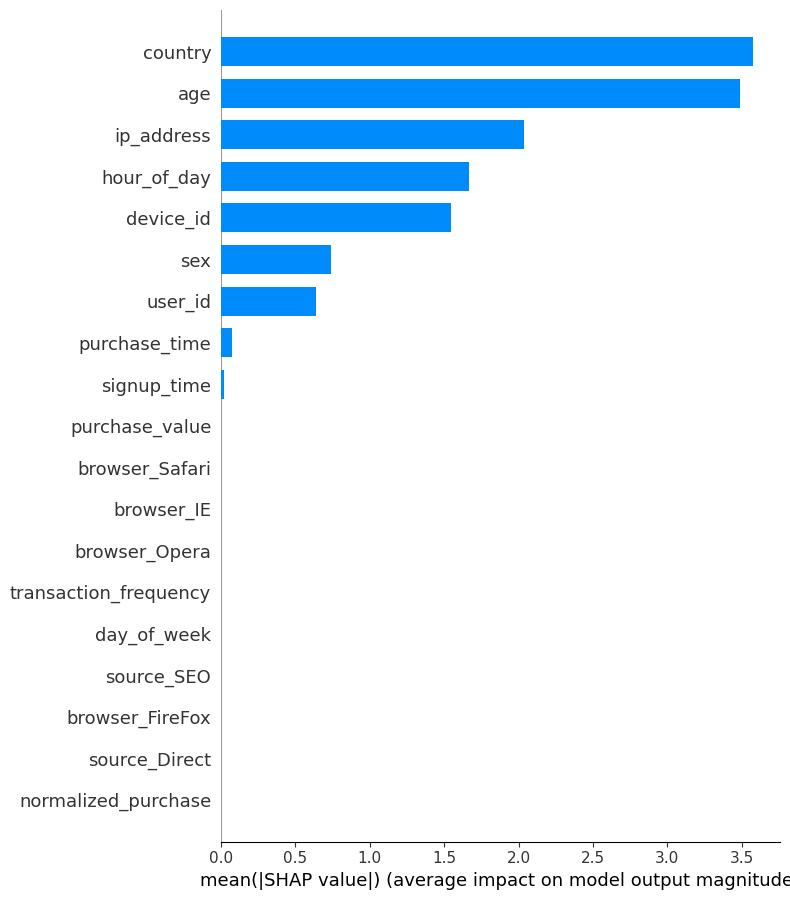

In [5]:
import shap  # SHAP for explainability
import pickle  # For loading the saved model
import pandas as pd  # For handling the data
from sklearn.model_selection import train_test_split  # For creating train/test sets
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # For encoding high cardinality
import numpy as np

# Step 1: Load the Gradient Boosting model using an absolute path (update as needed)
model_path = r"C:\Users\Beab\Desktop\Kifiya_AIM\Enhanced-Fraud-Detection\Models\gradient_boosting_model.pkl"
try:
    with open(model_path, 'rb') as file:
        model = pickle.load(file)
except FileNotFoundError:
    print(f"File not found at {model_path}. Please check the path.")

# Step 2: Load your data
data_path = r"C:\Users\Beab\Desktop\Kifiya_AIM\Enhanced-Fraud-Detection\notebooks\Data\df_merged.csv"  # Absolute path
try:
    data = pd.read_csv(data_path)
except FileNotFoundError:
    print(f"Data file not found at {data_path}. Please check the path.")

# Step 3: Preprocess to ensure all data is numeric
X = data.drop(columns=['class'])  # Features
y = data['class']  # Target

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
low_cardinality_cols = [col for col in categorical_cols if X[col].nunique() <= 10]
high_cardinality_cols = [col for col in categorical_cols if X[col].nunique() > 10]

# Label encode high-cardinality columns
for col in high_cardinality_cols:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# One-hot encode low-cardinality columns and drop the first to avoid multicollinearity
X = pd.get_dummies(X, columns=low_cardinality_cols, drop_first=True)

# Ensure all data is converted to float64
X = X.astype(np.float64)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize the SHAP Explainer for Gradient Boosting
# Use TreeExplainer specifically for tree-based models like Gradient Boosting
explainer = shap.TreeExplainer(model)

# Step 6: Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Step 7: Plot the SHAP Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


# Interpretation of SHAP Evaluation

#### SHAP Evaluation Summary:
The SHAP (Shapley Additive Explanations) summary plot visualizes the impact of each feature on the model's predictions. 
This plot ranks features based on their influence on the target variable, giving a quick overview of feature importance.

#### From the plot:
Features appearing at the top are the most impactful in determining the model's prediction, 
meaning they contribute the most toward whether a transaction is classified as fraudulent or non-fraudulent.
Each feature’s impact is displayed with color, representing feature values. For example, blue might indicate a low feature value, while red indicates a high feature value.
This color coding helps in understanding how different ranges of feature values influence predictions. 
For instance, if a high value of a specific feature (marked in red) increases the likelihood of fraud, this pattern will appear clearly in the summary plot.

Overall, the SHAP evaluation provides crucial insights into the model’s decision-making process, improving the interpretability and trustworthiness of our fraud detection model.
This interpretability is particularly useful when explaining model predictions to stakeholders or identifying potential model improvements.
